In [18]:
import re
import csv

# Month name to number
month_map = {
    'january': '01', 'jan': '01',
    'february': '02', 'feb': '02',
    'march': '03', 'mar': '03',
    'april': '04', 'apr': '04',
    'may': '05',
    'june': '06', 'jun': '06',
    'july': '07', 'jul': '07',
    'august': '08', 'aug': '08',
    'september': '09', 'sep': '09', 'sept': '09',
    'october': '10', 'oct': '10',
    'november': '11', 'nov': '11',
    'december': '12', 'dec': '12'
}

def clean_day(day):
    return re.sub(r'(st|nd|rd|th)', '', day)

def parse_date(text):
    text = text.lower()

    # Match: 21st June 2024 or 21st of June, 2024
    m1 = re.search(r'(\d{1,2})(st|nd|rd|th)?(?:\s+of)?\s+([a-zA-Z]+)[,\s]+(\d{4})', text)
    if m1:
        day = clean_day(m1.group(1))
        month = month_map.get(m1.group(3).strip().lower(), '00')
        year = m1.group(4)
        return f"{day.zfill(2)}/{month}/{year}"

    # Match: June 21, 2024
    m2 = re.search(r'([a-zA-Z]+)\s+(\d{1,2})(st|nd|rd|th)?,?\s+(\d{4})', text)
    if m2:
        month = month_map.get(m2.group(1).strip().lower(), '00')
        day = clean_day(m2.group(2))
        year = m2.group(4)
        return f"{day.zfill(2)}/{month}/{year}"

    # Match: YYYY-MM-DD
    m3 = re.search(r'(\d{4})-(\d{2})-(\d{2})', text)
    if m3:
        year, month, day = m3.groups()
        return f"{day}/{month}/{year}"

    # Match: DD/MM/YYYY or MM/DD/YYYY (assuming DD/MM/YYYY)
    m4 = re.search(r'(\d{1,2})/(\d{1,2})/(\d{4})', text)
    if m4:
        day, month, year = m4.groups()
        return f"{day.zfill(2)}/{month.zfill(2)}/{year}"

    return "DATE NOT FOUND"

# Read input CSV
input_path = "date_parser_testcases (1).csv"
output_rows = []

with open(input_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        text = row['text'] if 'text' in row else list(row.values())[0]
        parsed = parse_date(text)
        output_rows.append({'text': text, 'parsed_date': parsed})

# Write output CSV
with open("parsed_dates_output.csv", mode='w', newline='', encoding='utf-8') as out_csv:
    writer = csv.DictWriter(out_csv, fieldnames=['text', 'parsed_date'])
    writer.writeheader()
    writer.writerows(output_rows)

# ✅ Print a few samples
print("\n Sample Parsed Dates (First 5):\n")
for sample in output_rows[:5]:
    print(f"Input: {sample['text']}")
    print(f"Parsed: {sample['parsed_date']}\n")

print(" All dates parsed. Output saved to 'parsed_dates_output.csv'")



 Sample Parsed Dates (First 5):

Input: The event will take place on March 5, 2023.
Parsed: 05/03/2023

Input: Her birthday is on 07/08/1990.
Parsed: 07/08/1990

Input: The deadline is 2022-12-31.
Parsed: 31/12/2022

Input: We met on 1st of January 2000.
Parsed: 01/01/2000

Input: The concert is scheduled for 15th September, 2021.
Parsed: 15/09/2021

 All dates parsed. Output saved to 'parsed_dates_output.csv'


In [1]:
!pip install --upgrade pip setuptools wheel
!pip install gensim==4.3.2


  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332391 sha256=21707901fc7fc7674c2dd0aff29c0d5e150cecf093d11cbe7ec5657b71887550
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [4]:
# Imports
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from gensim.models import Word2Vec, FastText
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import kagglehub

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')

# Download latest version of dataset from Kaggle
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)

# Load the data from the downloaded path
df = pd.read_csv(f"{path}/IMDB Dataset.csv")
print(df.head())
print(df['sentiment'].value_counts())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

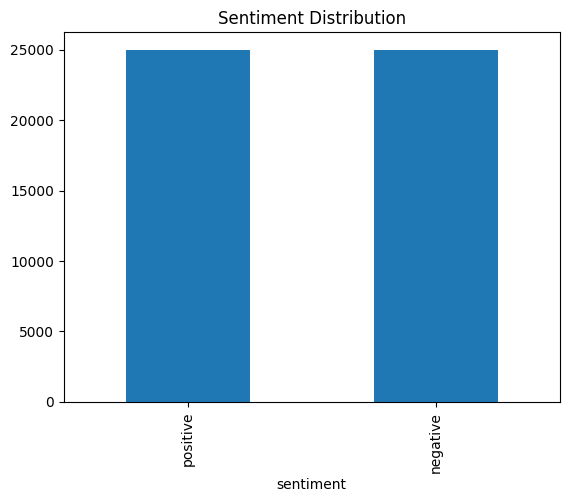

In [5]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print(df['review_length'].describe())
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")

In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and non-alpha tokens
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

df['tokens'] = df['review'].apply(clean_text)
print(df['tokens'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: tokens, dtype: object


In [8]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Testing if the punkt tokenizer works now!"))

['Testing', 'if', 'the', 'punkt', 'tokenizer', 'works', 'now', '!']


In [9]:
X = df['tokens']
y = df['sentiment'].map({'positive':1, 'negative':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
def get_review_vector(tokens, model, vector_size):
    vecs = [model[w] for w in tokens if w in model]
    if not vecs:
        return np.zeros(vector_size)
    return np.mean(vecs, axis=0)


In [11]:
#pre trained
wv = api.load("glove-wiki-gigaword-100")  # Or try 'word2vec-google-news-300'

X_train_wv = np.vstack([get_review_vector(x, wv, 100) for x in X_train])
X_test_wv  = np.vstack([get_review_vector(x, wv, 100) for x in X_test])


[==================================================] 100.0% 128.1/128.1MB downloaded


In [12]:
#Custom Skip-gram Word2Vec
skipgram_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=2, sg=1, epochs=5)
X_train_sg = np.vstack([get_review_vector(x, skipgram_model.wv, 100) for x in X_train])
X_test_sg  = np.vstack([get_review_vector(x, skipgram_model.wv, 100) for x in X_test])

In [13]:
#Custom CBOW Word2Vec
cbow_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=2, sg=0, epochs=5)
X_train_cbow = np.vstack([get_review_vector(x, cbow_model.wv, 100) for x in X_train])
X_test_cbow  = np.vstack([get_review_vector(x, cbow_model.wv, 100) for x in X_test])

In [14]:
#Custom FastText
ft_model = FastText(sentences=X_train, vector_size=100, window=5, min_count=2, epochs=5)
X_train_ft = np.vstack([get_review_vector(x, ft_model.wv, 100) for x in X_train])
X_test_ft  = np.vstack([get_review_vector(x, ft_model.wv, 100) for x in X_test])

In [15]:
#training and eval
def eval_model(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    pr, rc, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")
    return acc, pr, rc, f1

results = {}
results['Pre-trained W2V'] = eval_model(X_train_wv, X_test_wv, y_train, y_test)
results['Skip-gram']        = eval_model(X_train_sg, X_test_sg, y_train, y_test)
results['CBOW']             = eval_model(X_train_cbow, X_test_cbow, y_train, y_test)
results['FastText']         = eval_model(X_train_ft, X_test_ft, y_train, y_test)


In [16]:
#results
results_table = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1"]).T
print(results_table)


                 Accuracy  Precision    Recall        F1
Pre-trained W2V    0.7992   0.801832  0.798968  0.800398
Skip-gram          0.8714   0.868592  0.877555  0.873050
CBOW               0.8549   0.849027  0.866045  0.857452
FastText           0.8398   0.835186  0.849772  0.842416
